# Pareto Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [6]:
data = pd.read_csv('/Users/datasets/googleplaystore.csv')
data.shape

(10841, 13)

In [7]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [8]:
data['installs_numeric'] = data['Installs'].apply(lambda v: re.sub('[^0-9]', '', v)).replace('', None).astype(float)

In [9]:
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


## Which categories of apps are mostly installed?

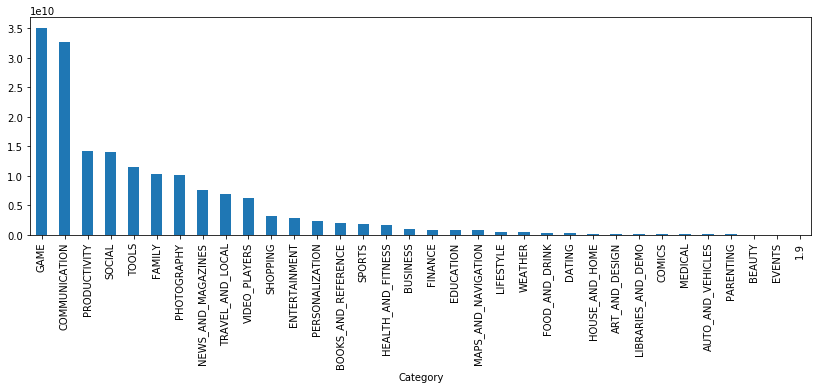

In [10]:
cats_inst = data.groupby(['Category'])['installs_numeric'].sum()
cats_inst.sort_values(ascending=False).plot.bar(figsize=(14,4))

In [11]:
cats_inst = data.groupby(['Category'])['installs_numeric'].sum()
cats_inst = cats_inst.sort_values(ascending=False)
cats_inst.head()

Category
GAME             3.508602e+10
COMMUNICATION    3.264728e+10
PRODUCTIVITY     1.417609e+10
SOCIAL           1.406987e+10
TOOLS            1.145277e+10
Name: installs_numeric, dtype: float64

In [12]:
cats_inst_cum = cats_inst.cumsum()
cats_inst_cum.head()

Category
GAME             3.508602e+10
COMMUNICATION    6.773330e+10
PRODUCTIVITY     8.190939e+10
SOCIAL           9.597926e+10
TOOLS            1.074320e+11
Name: installs_numeric, dtype: float64

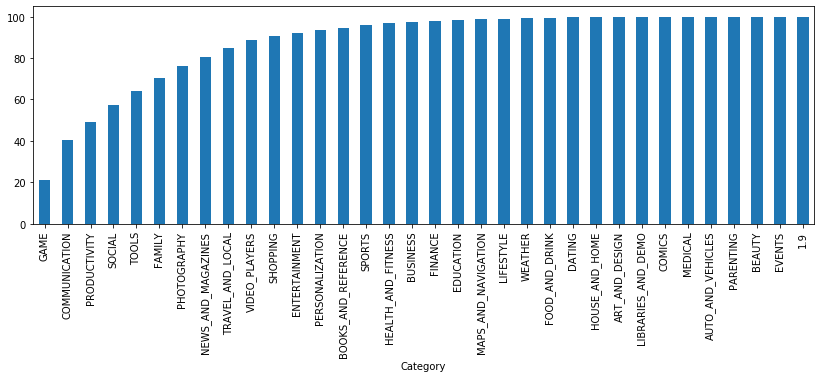

In [13]:
cats_inst_cum_perc = cats_inst.cumsum() / cats_inst.sum() * 100
cats_inst_cum_perc.plot.bar(figsize=(14,4))
#cats_inst_cum_perc.plot.line(figsize=(14,4), color='red')

In [14]:
imp_cats = cats_inst_cum_perc[cats_inst_cum_perc < 80]
imp_cats

Category
GAME             20.930194
COMMUNICATION    40.405580
PRODUCTIVITY     48.862176
SOCIAL           57.255406
TOOLS            64.087435
FAMILY           70.206893
PHOTOGRAPHY      76.224930
Name: installs_numeric, dtype: float64

In [15]:
len(imp_cats) / len(cats_inst_cum_perc) * 100

20.588235294117645

In [16]:
def pareto_results(data):
    data_cumsum = data.sort_values(ascending=False).cumsum() / data.sum()
    imp_cats = data_cumsum[data_cumsum < 0.8]
    summary_data = {
        'n_major_categories': len(imp_cats),
        'pareto_percentage': len(imp_cats) / len(data) * 100,
        'major_categories': imp_cats.index.tolist(),
        'n_total_categories': len(data), 
    }
    return summary_data

In [19]:
def pareto_chart(data):
    data_cumsum = data.sort_values(ascending=False).cumsum() / data.sum() * 100
    fig, ax1 = plt.subplots(figsize=(10,4))

    ax2 = ax1.twinx()
    data_cumsum.head(200).plot.line(ax=ax2, color='red')
    data.sort_values(ascending=False).head(200).plot.bar(ax=ax1)

    ax1.set_xlabel(data.name)
    ax1.set_ylabel('Absolute numbers')
    ax2.set_ylabel('Cumulative Percentage')

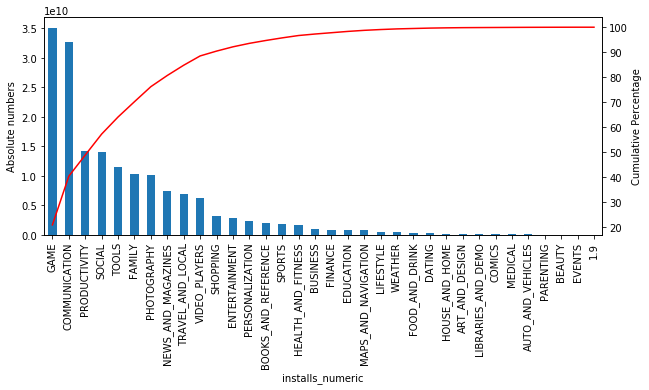

In [20]:
pareto_chart(cats_inst)

In [18]:
cats_inst.head()

Category
GAME             3.508602e+10
COMMUNICATION    3.264728e+10
PRODUCTIVITY     1.417609e+10
SOCIAL           1.406987e+10
TOOLS            1.145277e+10
Name: installs_numeric, dtype: float64

In [17]:
summary = pareto_results(cats_inst)
summary

{'n_major_categories': 7,
 'pareto_percentage': 20.588235294117645,
 'major_categories': ['GAME',
  'COMMUNICATION',
  'PRODUCTIVITY',
  'SOCIAL',
  'TOOLS',
  'FAMILY',
  'PHOTOGRAPHY'],
 'n_total_categories': 34}